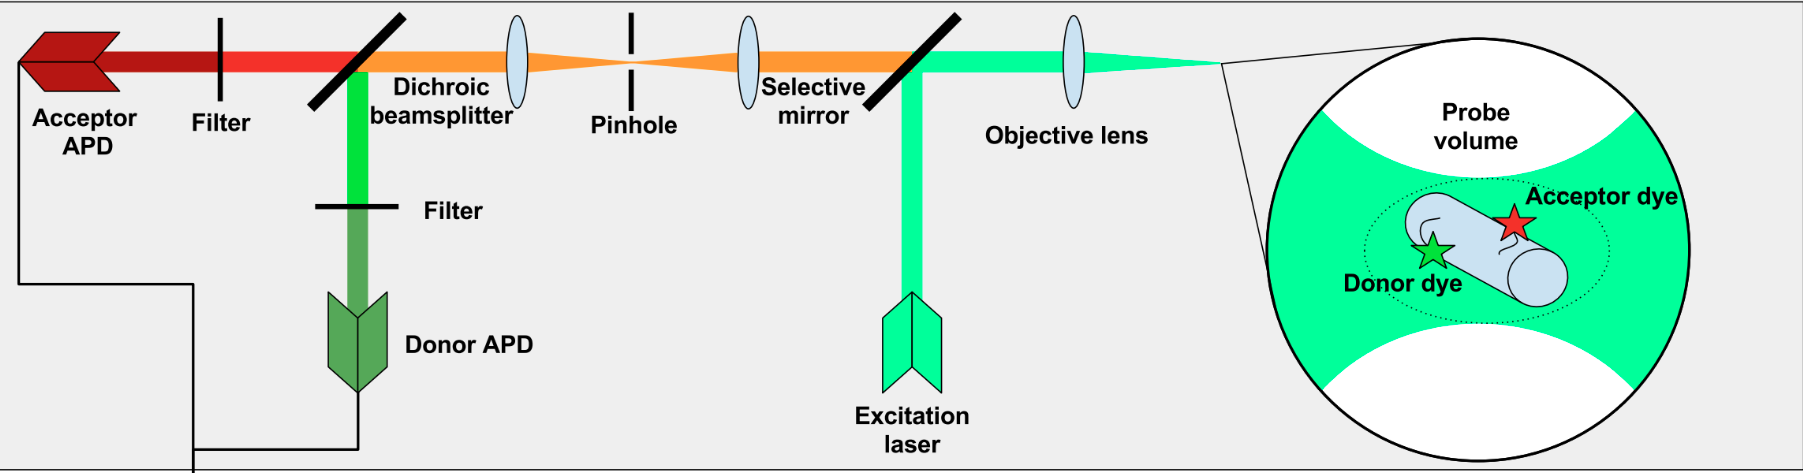

In [523]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, Label
from ipywidgets import interactive, fixed
from io import StringIO
from io import BytesIO

In [555]:
#ПОЛНЫЙ КОД 
#обрабатывает файл без сохранения (через байтовый поток)
def pd_byte(data):
    content = data[0].content.tobytes()
    content = io.BytesIO(content)
    df1 = pd.read_csv(content, sep = '\t', skiprows = 2)
    return df1

def FRET(file, BackA, BackD, ThrA, ThrD, crosst):
    data1 = pd_byte(file)
    data1.columns = ['Time1', 'Cy5', 'Time2', 'Cy3']
    data1 = data1.dropna()
    # data1 = data1[data1["Cy3"].str.contains("none") == False]
    # data1 = data1[data1["Cy5"].str.contains("none") == False]
    data1 = data1.astype('float64')
    data1['Fa'] = data1['Cy5'] - float(BackA)
    data1['Fd'] = data1['Cy3'] - float(BackD) - float(crosst) * data1['Fa']
    data1 = data1.loc[data1["Fa"] > 0]
    data1 = data1.loc[data1["Fd"] > 0]
    eq = data1['Time1'].equals(data1['Time2'])
    if eq == True:
        print('Корректные данные: Времена сьемки совпадают')
    else:
        print('ВНИМАНИЕ: не совпадают интервалы съемки флуоресценции донора и акцептора')
    data1 = data1.loc[((data1['Fa'] > float(ThrA)) | (data1['Fd'] > float(ThrD)))] 
    data1['FRET'] =  data1['Fa']/(data1['Fa'] + data1['Fd'])
    data1.hist(column = 'FRET', bins = 50, grid = False)


uploader = widgets.FileUpload(
    accept='.txt',  
    multiple=False  
)
uploaded_file = uploader.value


l1 = Label("Background", layout=Layout(display="flex", justify_content="center", width="auto"))
l2 = Label("Threshold", layout=Layout(display="flex", justify_content="center", width="auto"))
l3 = Label("Crosstalk", layout=Layout(display="flex", justify_content="center", width="auto"))

BackD_w = widgets.Text(
    value= "1.3",
    placeholder='Введите значение флуоресценции донора',
    description='Donor',
    disabled=False
)

BackA_w = widgets.Text(
    value= "0.9",
    placeholder='Введите значение флуоресценции акцептора',
    description='Acceptor',
    disabled=False,
)

ThrD_w = widgets.Text(
    value= "10",
    placeholder='Введите значение порога',
    disabled=False,
    description = '_'
    
)

ThrA_w = widgets.Text(
    value= "5",
    placeholder='Введите значение порога',
    disabled=False,
    description = '_'

)

crosst_w = widgets.Text(
    value= "0.21",
    placeholder='Введите значение альфа',
    disabled=False,
    description = '_'
    

)

FRET_out  = widgets.interactive(FRET, {'manual': True}, file = uploader,
                                      BackA = BackA_w,
                                      BackD =  BackD_w,
                                      ThrA = ThrA_w, 
                                      ThrD = ThrD_w, 
                                      crosst = crosst_w)
             
FRET_out.children[6].description = 'Submit'
FRET_out.children[6].style.button_color = 'red'
left = widgets.VBox([l1, FRET_out.children[2], FRET_out.children[1]])
left1 = widgets.VBox([FRET_out.children[0], FRET_out.children[6]])
central = widgets.VBox([l2, FRET_out.children[4], FRET_out.children[3]])
right = widgets.VBox([l3, FRET_out.children[5]])
ui1 = widgets.HBox([left1, left, central, right])
ui3 = widgets.VBox([ui1, FRET_out.children[7]])
display(ui3)

Разместите получившееся приложение в github при помощи jupyterlite или binder